# Naive Bayes Classification - Weather Data

In [20]:
import numpy as np
import pandas as pd

In [21]:
df=pd.read_csv("weather.csv")
df.head()

,Id,Outlook,Temperature,Humidity,Windy,Play
0,1,Sunny,Hot,High,False,No
1,2,Sunny,Hot,High,True,No
2,3,Overcast,Hot,High,False,Yes
3,4,Rainy,Mild,High,False,Yes
4,5,Rainy,Cool,Normal,False,Yes


In [3]:
#To count number of null values in each column
df.isnull().sum()

Id             0
Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

In [22]:
#To get the summary of the data -- best applied for numeric data
df.describe(include='all')

,Id,Outlook,Temperature,Humidity,Windy,Play
count,14.0000,14,14,14,14,14
unique,NaN,3,3,2,2,2
top,NaN,Rainy,Mild,Normal,False,Yes
freq,NaN,5,6,7,8,9
mean,7.5000,NaN,NaN,NaN,NaN,NaN
std,4.1833,NaN,NaN,NaN,NaN,NaN
min,1.0000,NaN,NaN,NaN,NaN,NaN
25%,4.2500,NaN,NaN,NaN,NaN,NaN
50%,7.5000,NaN,NaN,NaN,NaN,NaN
75%,10.7500,NaN,NaN,NaN,NaN,NaN


In [23]:
# One hot encoding - label into numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Outlook'] = le.fit_transform(df.Outlook)
df['Temperature'] = le.fit_transform(df.Temperature)
df['Humidity'] = le.fit_transform(df.Humidity)
df['Windy'] = le.fit_transform(df.Windy)
df['Play'] = le.fit_transform(df.Play)
df.head()

,Id,Outlook,Temperature,Humidity,Windy,Play
0,1,2,1,0,0,0
1,2,2,1,0,1,0
2,3,0,1,0,0,1
3,4,1,2,0,0,1
4,5,1,0,1,0,1


In [24]:
#identify the dependent and independent variables
x=df[['Outlook','Temperature','Humidity','Windy']]
y=df['Play']

In [25]:
# split of train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(y_train)

4     1
1     0
12    1
0     0
13    0
9     1
8     1
11    1
5     0
Name: Play, dtype: int32


In [26]:
#Create a Gaussian Classifier
from sklearn.naive_bayes import GaussianNB #works with normal distribution
model = GaussianNB()

# Train the model using the training sets 
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
#predict on the test set
y_pred=model.predict(x_test)
print(y_pred)

[1 0 1 1 0]


In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report,f1_score
cm=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cm)
accuracy=metrics.accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", accuracy*100)
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

Confusion Matrix
 [[1 0]
 [1 3]]
Gaussian Naive Bayes model accuracy(in %): 80.0
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

   micro avg       0.80      0.80      0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

0.8571428571428571


In [ ]:
tp=cm[0,0]
tn=cm[0,1]
fp=cm[1,0]
fn=cm[1,1]
recall=tp/(tp+fp)*100
precision=tp/(tp+tn)*100
print("Tpr:", recall)
print("\nFpr:",precision)

AUC:0.875
fpr: [0. 0. 1.]

tpr: [0.   0.75 1.  ]

threshold: [2 1 0]


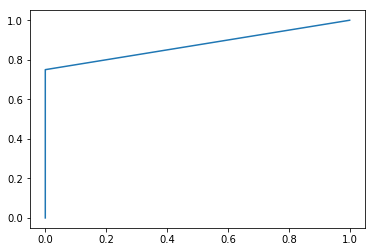

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC:%.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("fpr:",fpr)
print("\ntpr:",tpr)
print("\nthreshold:",thresholds)

# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()

In [ ]:
#test for a new data
x1_test=[1,0,0,1]
print(x1_test)
model.fit(x1_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB #works on binary/boolean features
# Create Bernoulli Naive Bayes object with prior probabilities of each class
clf2 = BernoulliNB(class_prior=[0.10, 0.90])

# Train model
modelB = clf2.fit(x_train, y_train)
modelB


In [ ]:
yb_pred=modelB.predict(x_test)
print(yb_pred)
accuracy1=metrics.accuracy_score(y_test, yb_pred)
print("Bernoulli Naive Bayes model accuracy(in %):", accuracy1*100)
metrics.confusion_matrix(y_test,yb_pred)

In [ ]:
from sklearn.naive_bayes import MultinomialNB #works with occurence counts
clf1 = MultinomialNB()
clf1.fit(x_train,y_train)
ym_pred=clf1.predict(x_test)
print(ym_pred)
print(metrics.confusion_matrix(y_test,ym_pred))
print(metrics.accuracy_score(y_test,ym_pred))

# KNN classification

In [12]:
# build the model
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5) 
#build the classifier
classifier.fit(x_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
#predict
y_pred = classifier.predict(x_test) 

In [15]:
#evaluating the algorithm
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[1 0]
 [2 2]]
Accuracy: 0.6


In [16]:
#Finding the optimal k
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 6):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    

In [17]:
print(error)

[0.6, 0.6, 0.4, 0.4, 0.4]


Text(0, 0.5, 'Mean Error')

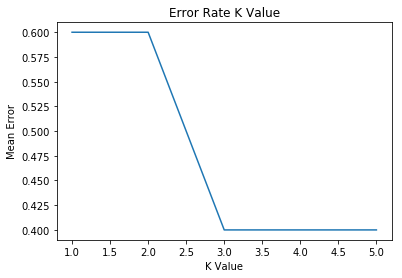

In [19]:
#plot k values
import matplotlib.pyplot as plt 
#plt.figure(figsize=(12, 6))  
plt.plot(range(1, 6), error)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 